## PCA pictures

降維度的分析，可以提供我們看是否所偵測的菌群在不同病人族群裡有專一趨勢

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
datachou = pd.read_csv('genus.csv')
datachou.head()

,genus,group,Actinomyces,Corynebacterium,Pseudoclavibacter,Rothia,Nocardioides,Alloscardovia,Bifidobacterium,Atopobium,...,Succinatimonas,Enterobacter,Proteus,Pseudomonas,Psychrobacter,Lysobacter,Pseudoxanthomonas,Pyramidobacter,Cloacibacillus,Akkermansia
0,S17,Normal,0.0,0.0,0.0,0.00385,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
1,S18,Normal,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
2,S24,Normal,0.0,0.0,0.0,0.00000,0.0,0.0,0.015311,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00013,0.021296
3,S42,Normal,0.0,0.0,0.0,0.00000,0.0,0.0,0.011054,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
4,S44,Normal,0.0,0.0,0.0,0.00000,0.0,0.0,0.030455,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.011823


In [7]:
import numpy as np
import seaborn as sns; sns.set()

In [8]:
datachou.fillna(0,inplace=True)
datachou.head()

,genus,group,Actinomyces,Corynebacterium,Pseudoclavibacter,Rothia,Nocardioides,Alloscardovia,Bifidobacterium,Atopobium,...,Succinatimonas,Enterobacter,Proteus,Pseudomonas,Psychrobacter,Lysobacter,Pseudoxanthomonas,Pyramidobacter,Cloacibacillus,Akkermansia
0,S17,Normal,0.0,0.0,0.0,0.00385,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
1,S18,Normal,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
2,S24,Normal,0.0,0.0,0.0,0.00000,0.0,0.0,0.015311,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00013,0.021296
3,S42,Normal,0.0,0.0,0.0,0.00000,0.0,0.0,0.011054,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
4,S44,Normal,0.0,0.0,0.0,0.00000,0.0,0.0,0.030455,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.011823


In [9]:
X_datachou = datachou.drop(['genus','group'], axis=1)  #丟掉非列入參數的部分
X_datachou.shape

(47, 91)

In [10]:
y_datachou = datachou['group'] #選擇分群
y_datachou.shape

(47,)

In [11]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_datachou)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_datachou)         # 4. Transform the data to two dimensions
X_2D.shape

(47, 2)

In [12]:
datachou['PCA1'] = X_2D[:, 0]
datachou.head()

,genus,group,Actinomyces,Corynebacterium,Pseudoclavibacter,Rothia,Nocardioides,Alloscardovia,Bifidobacterium,Atopobium,...,Enterobacter,Proteus,Pseudomonas,Psychrobacter,Lysobacter,Pseudoxanthomonas,Pyramidobacter,Cloacibacillus,Akkermansia,PCA1
0,S17,Normal,0.0,0.0,0.0,0.00385,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,-0.003574
1,S18,Normal,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.001092
2,S24,Normal,0.0,0.0,0.0,0.00000,0.0,0.0,0.015311,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00013,0.021296,-0.014362
3,S42,Normal,0.0,0.0,0.0,0.00000,0.0,0.0,0.011054,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.137007
4,S44,Normal,0.0,0.0,0.0,0.00000,0.0,0.0,0.030455,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.011823,0.048644


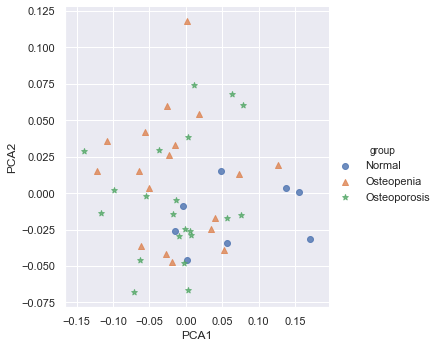

In [13]:
datachou['PCA1'] = X_2D[:, 0]
datachou['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='group', markers=['o','^','*'],data=datachou, fit_reg=False);